<a href="https://colab.research.google.com/github/manjulabab/Abburi-Alekhya/blob/main/Hand_written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction-Classification Analysis**

The digit dataset consists of 8*8 pixel images of digits.the images attribute of the dataset stores 8*8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents

**Objective**

This project aims to perform handwritten digit prediction using classification analysis techniques in Python. The objective is to develop a model that can accurately classify images of handwritten digits into their respective numeric values.



**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

**Import data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

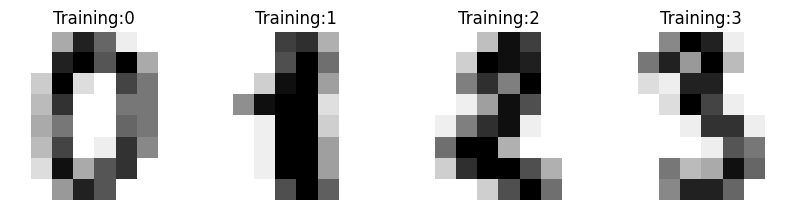

In [8]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i"% label)

**Data Preprocessing**

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

**Scaling Image Data**

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf=RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**predict Test Data**

In [33]:
y_pred=rf.predict(X_test)

In [34]:
y_pred

array([3, 4, 1, 1, 3, 4, 5, 8, 7, 3, 4, 8, 7, 9, 2, 2, 6, 5, 5, 7, 4, 5,
       8, 9, 6, 2, 4, 9, 4, 5, 3, 7, 5, 7, 8, 6, 0, 0, 2, 8, 2, 2, 7, 9,
       7, 0, 9, 7, 7, 7, 1, 6, 4, 7, 3, 2, 4, 2, 3, 1, 7, 5, 6, 6, 5, 6,
       3, 7, 5, 6, 0, 2, 3, 4, 7, 8, 0, 5, 7, 0, 7, 9, 5, 5, 5, 8, 1, 2,
       6, 5, 5, 0, 0, 0, 8, 1, 2, 1, 1, 8, 7, 0, 4, 7, 3, 0, 1, 7, 7, 3,
       0, 9, 7, 3, 7, 5, 1, 8, 7, 4, 4, 8, 0, 3, 8, 3, 6, 5, 5, 7, 1, 8,
       0, 0, 9, 9, 2, 7, 0, 4, 6, 6, 4, 8, 5, 0, 2, 9, 5, 5, 9, 0, 3, 4,
       4, 6, 0, 5, 9, 2, 7, 0, 3, 8, 2, 5, 5, 1, 8, 5, 7, 9, 3, 3, 2, 8,
       2, 9, 3, 0, 0, 6, 0, 8, 5, 8, 3, 0, 5, 5, 1, 0, 8, 6, 4, 7, 3, 3,
       6, 9, 8, 1, 9, 7, 5, 8, 3, 5, 8, 9, 2, 2, 1, 7, 4, 0, 0, 3, 1, 1,
       1, 5, 4, 6, 7, 5, 8, 4, 6, 8, 5, 1, 5, 2, 0, 3, 6, 0, 7, 0, 1, 0,
       3, 9, 8, 4, 3, 1, 9, 8, 2, 0, 5, 0, 4, 9, 3, 1, 8, 1, 8, 1, 1, 8,
       6, 3, 8, 7, 7, 7, 4, 3, 2, 3, 2, 2, 5, 2, 4, 9, 6, 6, 7, 9, 3, 3,
       0, 3, 0, 4, 6, 0, 3, 7, 8, 7, 4, 0, 8, 4, 0,

**Model Accuracy**

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
confusion_matrix(y_test,y_pred)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  3,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  1],
       [ 0,  2,  1,  1,  1,  1,  0,  1, 62,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  1,  0, 37]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.96      1.00      0.98        52
           2       0.98      1.00      0.99        50
           3       0.95      0.90      0.92        60
           4       0.96      0.96      0.96        45
           5       0.92      1.00      0.96        59
           6       1.00      0.96      0.98        55
           7       0.92      0.98      0.95        58
           8       0.97      0.89      0.93        70
           9       0.95      0.90      0.92        41

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



**Explanation**

The project follows a data analytics pipeline, starting with data collection and preprocessing.Exploratory data analysis is conducted to gain insights into the dataset. Visualizations and statistical analysis are used to understand the distribution of the digits, explore patterns, and identify potential challenges in the classification task.Next, the dataset is split into training and testing sets. Classification algorithms such as Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines (SVM) are implemented to train the model on the training data.he trained model is evaluated using evaluation metrics such as accuracy, precision, recall, and F1-score. Cross-validation techniques, like k-fold cross-validation, are used to assess the model's performance on unseen data and mitigate overfitting.